# Monte Carlo simulation MAMR1C 2T Rayleigh Vo=Io/STOR

<img src="2T_STORFF.PNG" width="600"> 

In [470]:
__author__ ='Sung Chung'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import rayleigh
import datetime

pd.set_option('display.max_column',500)

In [471]:
#Find Rayleigh parameters from mean and sigma
def findRayleighLocScale(targetMean, targetSigma):
    mini=0.00001
    maxi=20.0
    mid_s=10.0
#find scale parameter    
    while np.abs(rayleigh.std(1,mid_s)-targetSigma)>0.001*targetSigma:       #less than 1% from target
        if (rayleigh.std(1,mid_s)-targetSigma)>0:
            maxi=mid_s
            mid_s=(mini+maxi)/2
        else:
            mini=mid_s
            mid_s=(mini+maxi)/2       
   
    mini=1
    maxi=100
    mid_l=50.0   
#find loc parameter        
    while np.abs(rayleigh.mean(mid_l,mid_s)-targetMean)>0.001*targetMean:                #less than 1% from target
        if rayleigh.mean(mid_l,mid_s)-targetMean>0:
            maxi=mid_l
            mid_l=(mini+maxi)/2
        else:
            mini=mid_l
            mid_l=(mini+maxi)/2           
    
    return mid_l,mid_s



####################### GetR function
def getSTOR(TG_R,SG_R,RL):
    TG_SG_resistance =  (TG_R)*(SG_R)/(TG_R+SG_R)
    STOR= (RL+TG_SG_resistance)
    return (TG_SG_resistance, STOR)

In [472]:
### input  df['bias_current']=V0/df['STOR']   : like no FF
V0=159.1
V1=113.9

T0=0
PCM_FACTOR =1.0
num_samples=10000

RT_dTdW=108*PCM_FACTOR                             #RTG dT / dW slope   
RS_dTdW=62*PCM_FACTOR                             #RSG dT / dW slope 

 #RN large TR:8.5%,  RS:7% sigma
case='A1'
RN=0  # with RN 
RT, RT_sigma = 11.37,0.97
RT0, RT0_sigma = 1.2, 0.03 
RTC, RTC_sigma = 10.17, 0.25  
RS, RS_sigma = 2.50, 0.175
RS0, RS0_sigma = 1.00, 0.025  
RSC, RSC_sigma = 6, 0.15 
RL0,RL0_sigma=1.45,0.036
RM0,RM0_sigma=2.49,0.062  

 #RN large TR:8.5%,  RS:7% sigma
case='A2'
RN=0  # with RN 
RT, RT_sigma = 11.37,1.93
RT0, RT0_sigma = 1.2, 0.03 
RTC, RTC_sigma = 10.17, 0.25  
RS, RS_sigma = 2.50, 0.35
RS0, RS0_sigma = 1.00, 0.025  
RSC, RSC_sigma = 6, 0.15 
RL0,RL0_sigma=1.45,0.036
RM0,RM0_sigma=2.49,0.062  



# NO RN large TR:8.5%,  RS:7% sigma
RN=1
case='B1'
RT, RT_sigma = 11.37,0.97  
RT0, RT0_sigma = 1.2, 0.03 
RTC, RTC_sigma =0.1, 0.003
RS, RS_sigma = 2.50, 0.175
RS0, RS0_sigma = 2.78, 0.07  
RSC, RSC_sigma = 0.1, 0.003 
RL0,RL0_sigma=1.45,0.036
RM0,RM0_sigma=2.49,0.062 

RN=1
case='B2'
RT, RT_sigma = 11.37,1.933 
RT0, RT0_sigma = 1.2, 0.03 
RTC, RTC_sigma =0.1, 0.003
RS, RS_sigma = 2.50, 0.35
RS0, RS0_sigma = 2.78, 0.07  
RSC, RSC_sigma = 0.1, 0.003 
RL0,RL0_sigma=1.45,0.036
RM0,RM0_sigma=2.49,0.062  




 

fname="MAMR1C_" + "_" + case 
 
#target mean and sigma -> return loc and scale
RT_L,RT_S=findRayleighLocScale(RT,RT_sigma)
RS_L,RS_S=findRayleighLocScale(RS,RS_sigma)


# distribution b 
RT_n=rayleigh.rvs(RT_L,RT_S,num_samples)
RT0_n=np.random.normal(RT0,RT0_sigma,num_samples)
RTC_n=np.random.normal(RTC,RTC_sigma,num_samples)
RS_n=rayleigh.rvs(RS_L,RS_S,num_samples)
RS0_n=np.random.normal(RS0,RS0_sigma,num_samples)
RSC_n=np.random.normal(RSC,RSC_sigma,num_samples)
RL0_n=np.random.normal(RL0,RL0_sigma,num_samples)
RM0_n=np.random.normal(RM0,RM0_sigma,num_samples)


df=pd.DataFrame({'RT':RT_n,'RT0':RT0_n,'RTC':RTC_n,'RS':RS_n,'RS0':RS0_n, 'RSC':RSC_n,'RL0':RL0_n,'RM0':RM0_n})

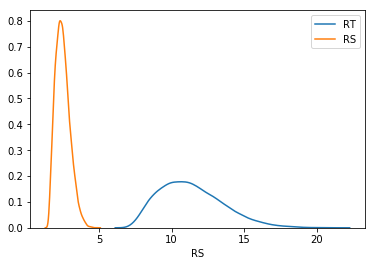

In [473]:
sns.distplot(df['RT'],hist=False,label="RT");
# sns.distplot(df['RTC'],hist=False,label="RTC");
sns.distplot(df['RS'],hist=False,label="RS");
# sns.distplot(df['RSC'],hist=False,label="RSC");
# ax=sns.distplot(df['RM0'],hist=False,label="RM0");

<img src="DOE6G_2T.PNG" ALIGN="left" width="400" height="500"> 

,RT,RT0,RTC,RS,RS0,RSC,RL0,RM0,RTL,RSL,TG_R,SG_R,RL,TG_SG_R,STOR
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,11.35,1.20,0.10,2.50,2.78,0.10,1.45,2.49,1.30,2.88,12.65,5.38,3.94,3.74,7.68
std,2.17,0.03,0.00,0.49,0.07,0.00,0.04,0.06,0.03,0.07,2.17,0.50,0.07,0.31,0.32
min,7.21,1.09,0.09,1.55,2.49,0.09,1.33,2.24,1.19,2.59,8.48,4.29,3.64,2.97,6.81
25%,9.71,1.18,0.10,2.13,2.73,0.10,1.43,2.45,1.28,2.83,11.01,5.01,3.89,3.52,7.46
50%,11.10,1.20,0.10,2.45,2.78,0.10,1.45,2.49,1.30,2.88,12.40,5.32,3.94,3.72,7.66
75%,12.73,1.22,0.10,2.80,2.83,0.10,1.47,2.53,1.32,2.93,14.04,5.69,3.99,3.94,7.88
max,21.17,1.32,0.11,4.84,3.04,0.12,1.58,2.73,1.42,3.13,22.45,7.71,4.22,5.09,9.17


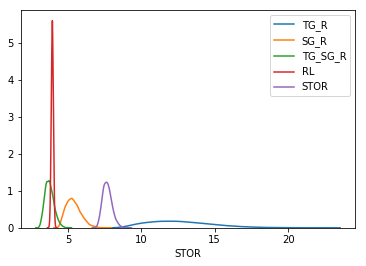

In [474]:
df['RTL']=df['RT0']+df['RTC']
df['RSL']=df['RS0']+df['RSC']

df['TG_R']=df['RT']+df['RTL']
df['SG_R']=df['RS']+df['RSL']
df['RL']=df['RL0']+df['RM0']
ans=np.vectorize(getSTOR)

df['TG_SG_R']=ans(df.TG_R,df.SG_R,df.RL)[0]
df['STOR']=ans(df.TG_R,df.SG_R,df.RL)[1]

sns.distplot(df['TG_R'],hist=False,label="TG_R");
sns.distplot(df['SG_R'],hist=False,label="SG_R");
sns.distplot(df['TG_SG_R'],hist=False,label="TG_SG_R");
sns.distplot(df['RL'],hist=False,label="RL");
sns.distplot(df['STOR'],hist=False,label="STOR",);

df.describe().round(2)

In [475]:
# Ibias from STOR

if RN==0:
    df['bias_current']=V0/df['STOR'] 
else:
    df['bias_current']=V1/df['STOR'] 

    
# df['bias_current']=15

<img src="simpleSTOR.PNG" width=500> 

In [476]:
df['TG_iRatio']=df['SG_R']/(df['TG_R']+df['SG_R'])
df['SG_iRatio']=1-df['TG_iRatio']
df['iTG']=df['bias_current']*df['TG_iRatio']
df['iSG']=df['bias_current']-df['iTG']

df['pwRTG']=(df['iTG']**2)*df['RT']/1000
df['pwRSG']=(df['iSG']**2)*df['RS']/1000

df['dT_RTG']=RT_dTdW*df['pwRTG']
df['dT_RSG']=RS_dTdW*df['pwRSG']
df['dTemp']=df['dT_RTG']+df['dT_RSG']
df['Temp']=df['dTemp']+T0

now=datetime.datetime.now()
month=now.month
day=now.day
second=now.second
df.to_csv(fname + "-{}-{}_{}sec.csv".format(month, day, second))
df.describe().round(2)

,RT,RT0,RTC,RS,RS0,RSC,RL0,RM0,RTL,RSL,TG_R,SG_R,RL,TG_SG_R,STOR,bias_current,TG_iRatio,SG_iRatio,iTG,iSG,pwRTG,pwRSG,dT_RTG,dT_RSG,dTemp,Temp
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,11.35,1.20,0.10,2.50,2.78,0.10,1.45,2.49,1.30,2.88,12.65,5.38,3.94,3.74,7.68,14.85,0.30,0.70,4.49,10.36,0.22,0.26,23.91,16.32,40.22,40.22
std,2.17,0.03,0.00,0.49,0.07,0.00,0.04,0.06,0.03,0.07,2.17,0.50,0.07,0.31,0.32,0.60,0.04,0.04,0.65,0.67,0.03,0.03,2.80,1.58,3.24,3.24
min,7.21,1.09,0.09,1.55,2.49,0.09,1.33,2.24,1.19,2.59,8.48,4.29,3.64,2.97,6.81,12.42,0.19,0.56,2.70,7.89,0.15,0.19,15.74,11.73,30.48,30.48
25%,9.71,1.18,0.10,2.13,2.73,0.10,1.43,2.45,1.28,2.83,11.01,5.01,3.89,3.52,7.46,14.45,0.27,0.67,4.00,9.91,0.20,0.24,21.89,15.18,37.91,37.91
50%,11.10,1.20,0.10,2.45,2.78,0.10,1.45,2.49,1.30,2.88,12.40,5.32,3.94,3.72,7.66,14.87,0.30,0.70,4.47,10.38,0.22,0.26,23.89,16.30,40.14,40.14
75%,12.73,1.22,0.10,2.80,2.83,0.10,1.47,2.53,1.32,2.93,14.04,5.69,3.99,3.94,7.88,15.28,0.33,0.73,4.96,10.83,0.24,0.28,25.85,17.38,42.49,42.49
max,21.17,1.32,0.11,4.84,3.04,0.12,1.58,2.73,1.42,3.13,22.45,7.71,4.22,5.09,9.17,16.72,0.44,0.81,6.47,12.23,0.31,0.36,33.67,22.61,51.70,51.70


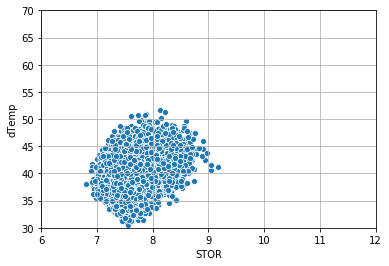

In [477]:
sns.scatterplot(x=df.STOR,y=df.dTemp)
plt.xlim(left=6, right = 12)
plt.ylim(bottom=30, top = 70)
plt.grid()

,STOR,dT_RTG,dT_RSG,dTemp
count,10000.00,10000.00,10000.00,10000.00
mean,7.68,23.91,16.32,40.22
std,0.32,2.80,1.58,3.24
min,6.81,15.74,11.73,30.48
25%,7.46,21.89,15.18,37.91
50%,7.66,23.89,16.30,40.14
75%,7.88,25.85,17.38,42.49
max,9.17,33.67,22.61,51.70


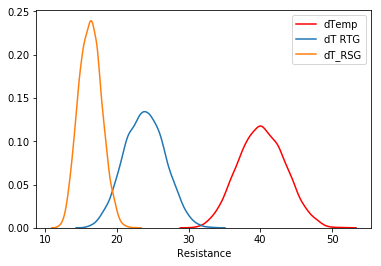

In [478]:
sns.distplot(df['dTemp'],hist=False,label='dTemp',color='r');
sns.distplot(df['dT_RTG'],hist=False,label="dT RTG");
sns.distplot(df['dT_RSG'],hist=False,label="dT_RSG");
plt.xlabel("Resistance")


df.describe().to_csv('RTG 20%, RSG: 10%, all lead 5%')
df[['STOR','dT_RTG','dT_RSG','dTemp']].describe().round(2)

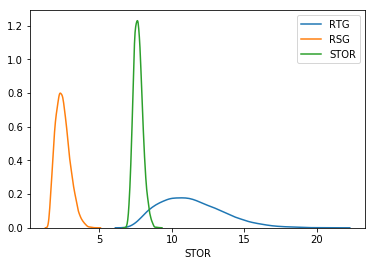

In [479]:


sns.distplot(df['RT'],hist=False,label="RTG");
sns.distplot(df['RS'],hist=False,label="RSG");
sns.distplot(df['STOR'],hist=False,label="STOR",);
# plt.xlim(left=4.7, right=6.5)
